In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-38-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Jan 19 2021 17:41:22CET



## Load of the data

In [3]:
regen_data = True 
# If we keep it as false, it's going to just load the data. If true it's going to regenerate the data again 

In [4]:
if regen_data:
    from process import load_generate_data
    from process import savedata
    regr_data, class_data = load_generate_data(0.1, 5)
    savedata(regr_data, "regression_data.csv")

In [5]:
if not regen_data:
    from process import loaddata
    regr_data = loaddata("regression_data.csv")

In [6]:
np.random.shuffle(regr_data)
y = regr_data[:,-6:]
x = regr_data[:,:5]

In [7]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 2118 
Valuation sample: 706


In [8]:
x.shape

(2824, 5)

In [9]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [21]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, activation = "sigmoid" , input_shape = x.shape))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (8, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (6))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [22]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 60, batch_size = 1032, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/60
3/3 [==============================] - 1s 97ms/step - loss: 0.6288 - mae: 0.6306 - val_loss: 0.4218 - val_mae: 0.5277
Epoch 2/60
3/3 [==============================] - 0s 22ms/step - loss: 0.5200 - mae: 0.5641 - val_loss: 0.3732 - val_mae: 0.4925
Epoch 3/60
3/3 [==============================] - 0s 28ms/step - loss: 0.4740 - mae: 0.5376 - val_loss: 0.3376 - val_mae: 0.4649
Epoch 4/60
3/3 [==============================] - 0s 33ms/step - loss: 0.4420 - mae: 0.5165 - val_loss: 0.3079 - val_mae: 0.4401
Epoch 5/60
3/3 [==============================] - 0s 34ms/step - loss: 0.4082 - mae: 0.4915 - val_loss: 0.2821 - val_mae: 0.4187
Epoch 6/60
3/3 [==============================] - 0s 32ms/step - loss: 0.3689 - mae: 0.4653 - val_loss: 0.2597 - val_mae: 0.3980
Epoch 7/60
3/3 [==============================] - 0s 36ms/step - loss: 0.3499 - mae: 0.4523 - val_loss: 0.2374 - val_mae: 0.3765
Epoch 8/60
3/3 [==============================] - 0s 32ms/step - loss: 0.3255 - mae: 0.4335 - val

3/3 [==============================] - 0s 24ms/step - loss: 0.0136 - mae: 0.0805 - val_loss: 9.6434e-04 - val_mae: 0.0290
Epoch 57/60
3/3 [==============================] - 0s 22ms/step - loss: 0.0130 - mae: 0.0781 - val_loss: 9.5715e-04 - val_mae: 0.0285
Epoch 58/60
3/3 [==============================] - 0s 23ms/step - loss: 0.0121 - mae: 0.0748 - val_loss: 8.0682e-04 - val_mae: 0.0248
Epoch 59/60
3/3 [==============================] - 0s 25ms/step - loss: 0.0109 - mae: 0.0703 - val_loss: 8.0753e-04 - val_mae: 0.0245
Epoch 60/60
3/3 [==============================] - 0s 24ms/step - loss: 0.0106 - mae: 0.0695 - val_loss: 9.1878e-04 - val_mae: 0.0267


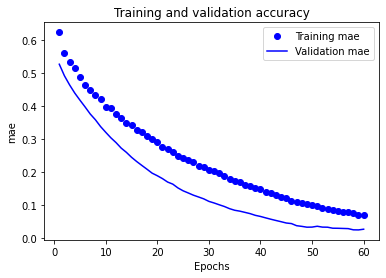

In [23]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

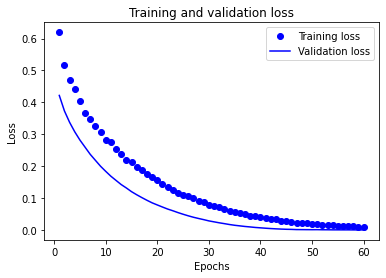

In [24]:
plt.clf()   # clear figure

loss = history.history['loss']
val_loss = history.history['val_loss']



plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()